In [2]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# Load your dataset
df = pd.read_csv("Genomicdata2.csv")  # Change to your actual file path


In [4]:
df.head()

,cDNA Designation,Amino Acid Designation,Gene,Classification,Clinical Significance,Variant Type,Region Start,Region End,Region Display,Codon,RefSeq-Gene Position
0,1_6915del,Met1fs,\tPKD1,Germline,Pathogenic,Truncating: Large Rearrangement,Exon 1,Exon 15,5'(E4F1)-EX15,1.0,1 to 32647
1,1_8015del,Met1fs,PKD1,Germline,Pathogenic,Truncating: Large Rearrangement,Exon 1,Exon 21,5'(RAB26)-EX21,1.0,1 to 35577
2,1_215del,Met1fs,PKD1,Germline,Pathogenic,Truncating: Large Rearrangement,Exon 1,Intron 1,5'-IVS1,1.0,3500 to 6000
3,1-11269del,Met1fs,PKD1,Germline,Pathogenic,Truncating: Large Rearrangement,Exon 1,Exon 39,EX1-EX39,1.0,5209 to 50690
4,1-215del,Met1fs,PKD1,Germline,Pathogenic,Truncating: Large Rearrangement,Exon 1,Exon 1,EX1,1.0,5210 to 5424


In [5]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows")

Dropped 22 duplicate rows


In [6]:
print(df.isnull().sum())

cDNA Designation           0
Amino Acid Designation    10
Gene                       1
Classification             3
Clinical Significance      3
Variant Type              13
Region Start               7
Region End                 7
Region Display            11
Codon                      2
RefSeq-Gene Position       3
dtype: int64


# Handling missing Values 

In [7]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

cDNA Designation          0.000000
Amino Acid Designation    5.208333
Gene                      0.520833
Classification            1.562500
Clinical Significance     1.562500
Variant Type              6.770833
Region Start              3.645833
Region End                3.645833
Region Display            5.729167
Codon                     1.041667
RefSeq-Gene Position      1.562500
dtype: float64


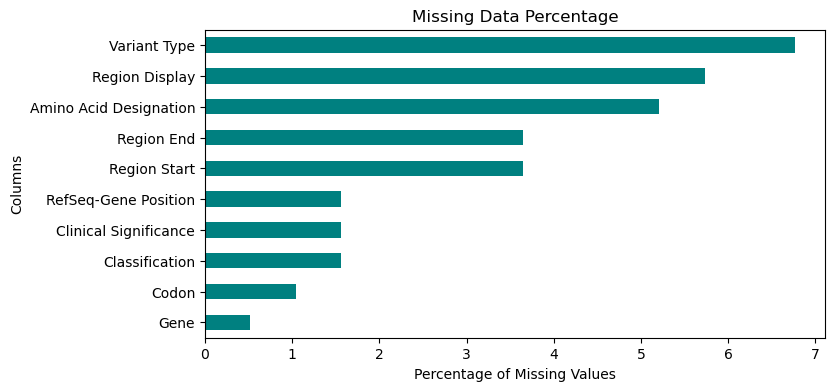

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Only keep columns with missing values

plt.figure(figsize=(8, 4))
missing_percentage.sort_values().plot(kind="barh", color="teal")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data Percentage")
plt.show()

In [9]:
print(df.dtypes)

cDNA Designation           object
Amino Acid Designation     object
Gene                       object
Classification             object
Clinical Significance      object
Variant Type               object
Region Start               object
Region End                 object
Region Display             object
Codon                     float64
RefSeq-Gene Position       object
dtype: object


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['cDNA Designation', 'Amino Acid Designation', 'Gene', 'Classification',
       'Clinical Significance', 'Variant Type', 'Region Start', 'Region End',
       'Region Display', 'RefSeq-Gene Position'],
      dtype='object')


In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['Codon'], dtype='object')


In [12]:
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # Numerical
        df[col] = df[col].fillna(df[col].median())

In [13]:
print(df.isnull().sum())  # Should be all 0 now!

cDNA Designation          0
Amino Acid Designation    0
Gene                      0
Classification            0
Clinical Significance     0
Variant Type              0
Region Start              0
Region End                0
Region Display            0
Codon                     0
RefSeq-Gene Position      0
dtype: int64


# EDA

In [14]:
import pandas as pd
from ydata_profiling import ProfileReport
from IPython.display import display, HTML

# Generate and display the report
profile = ProfileReport(df, title="Exploratory Data Analysis", explorative=True)
display(HTML(profile.to_notebook_iframe()))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 128.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.HTML object>

In [15]:

# Selecting initial useful features
selected_features = ["Amino Acid Designation", "Gene",  "Classification", "Variant Type", "Region Display", "Codon"]
target_column = "Clinical Significance"


In [16]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Region Start", "Region End"])

In [17]:
print(df_cleaned.dtypes)

cDNA Designation           object
Amino Acid Designation     object
Gene                       object
Classification             object
Clinical Significance      object
Variant Type               object
Region Display             object
Codon                     float64
RefSeq-Gene Position       object
dtype: object


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:

from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store encoders
label_encoders = {}

# Apply Label Encoding separately to each column
for col in ["Gene", "Variant Type", "Classification", "Codon","Amino Acid Designation", "Region Display" ]:
    le = LabelEncoder()  
    df_cleaned[col] = le.fit_transform(df_cleaned[col])  
    label_encoders[col] = le  # Store the encoder for later use

In [20]:
print(df_cleaned.head())

  cDNA Designation  Amino Acid Designation  Gene  Classification  \
0        1_6915del                     104     0               0   
1        1_8015del                     104     1               0   
2         1_215del                     104     1               0   
3       1-11269del                     104     1               0   
4         1-215del                     104     1               0   

  Clinical Significance  Variant Type  Region Display  Codon  \
0            Pathogenic            10               2      1   
1            Pathogenic            10               3      1   
2            Pathogenic            10               4      1   
3            Pathogenic            10               7      1   
4            Pathogenic            10               6      1   

  RefSeq-Gene Position  
0           1 to 32647  
1           1 to 35577  
2         3500 to 6000  
3        5209 to 50690  
4         5210 to 5424  


In [21]:
print(df_cleaned["Codon"].unique())

[  1   3   4   8   9  11  12  14  17  19  20  24  32  34   5   6  16  18
  25  26  27  51  35  36  38  40  42  43  44  46  47  48  49  60  61  83
  92  93  94  95  96  98 101 102 103 104 105 108 109 110 112 139 114 115
 116 117  10  13  21  22  28  30  33  39  41   2   7  29  31  45  53  54
   0 127 128 129 130 131 132 133 134 137 138 119  70  97 113 111 106 100
  99 124 126 107 123  91  71 122 120 135 136 121 125 118  67  78  90  72
  85  37  86  15  23  57  68  89  52  58  76  56  88  69  55  87  81  77
  50  75  64  65  62  84  82  73  59  74  63  79  80  66]


In [22]:
print(df_cleaned.dtypes)

cDNA Designation          object
Amino Acid Designation     int64
Gene                       int64
Classification             int64
Clinical Significance     object
Variant Type               int64
Region Display             int64
Codon                      int64
RefSeq-Gene Position      object
dtype: object


In [23]:
# Splitting data
X = df_cleaned[selected_features]
y = LabelEncoder().fit_transform(df_cleaned[target_column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
print(X_train.dtypes)

Amino Acid Designation    int64
Gene                      int64
Classification            int64
Variant Type              int64
Region Display            int64
Codon                     int64
dtype: object


In [25]:
print(label_encoders.keys())  # This should show all categorical columns

dict_keys(['Gene', 'Variant Type', 'Classification', 'Codon', 'Amino Acid Designation', 'Region Display'])


# ensemble learning

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


In [27]:
categorical_cols = ["cDNA Designation", "Amino Acid Designation", "Gene", "Classification",
                    "Variant Type", "Region Display", "RefSeq-Gene Position"]

In [28]:
# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoder if needed later


In [29]:
# Define X and y
X = df_cleaned.drop(columns=["Clinical Significance"])  
y = df_cleaned["Clinical Significance"]  

In [30]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=6)  
X_selected = selector.fit_transform(X, y)


In [31]:
print(X.dtypes)  # Look for 'object' columns

cDNA Designation          int64
Amino Acid Designation    int64
Gene                      int64
Classification            int64
Variant Type              int64
Region Display            int64
Codon                     int64
RefSeq-Gene Position      int64
dtype: object


In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [33]:
# Define models
svm = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [34]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('svm', svm),
    ('knn', knn),
    ('xgb', xgb)
], voting='soft')  # Use 'hard' for majority voting

In [35]:
# Train & Evaluate
voting_clf.fit(X_selected, y)
print("Voting Classifier Accuracy:", voting_clf.score(X_selected, y))

Voting Classifier Accuracy: 0.875


In [36]:
import pickle
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define base modelswhy 
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(probability=True, C=1, gamma='scale', kernel='rbf')),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100))
]

# Define stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier())

# Train the model
stacking_clf.fit(X_train, y_train)


# Assuming 'stacking_clf' is your trained model
with open("model.pkl", "wb") as f:
    pickle.dump(stacking_clf, f)

# Assuming 'label_encoders' is a dictionary of LabelEncoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("Model and encoders saved!")

Model and encoders saved!


In [37]:
# Load the saved model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model loaded successfully!")

Model loaded successfully!


In [38]:
with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

print(label_encoders.keys())  # This should match categorical columns

dict_keys(['cDNA Designation', 'Amino Acid Designation', 'Gene', 'Classification', 'Variant Type', 'Region Display', 'RefSeq-Gene Position'])


In [39]:
print(model.feature_names_in_)

['Amino Acid Designation' 'Gene' 'Classification' 'Variant Type'
 'Region Display' 'Codon']


In [40]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import pickle  

# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Load Label Encoders
with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# Define categorical columns
categorical_cols = ["Amino Acid Designation", "Gene", "Classification", "Variant Type", "Region Display"]
numerical_cols = ["Codon"]

# Create dropdowns with original values
input_widgets = {}
for col in categorical_cols:
    if col in label_encoders:
        original_values = list(label_encoders[col].classes_)  # ✅ FIX: Use `.classes_`
        
        input_widgets[col] = widgets.Dropdown(
            options=["Select"] + original_values,
            description=col[:10] + "...",
            style={"description_width": "initial"}
        )

# Define numeric input
input_widgets["Codon"] = widgets.IntText(description="Codon")

# Prediction button
predict_button = widgets.Button(description="Predict")

# Output display
output = widgets.Output()

# Function for prediction
def make_prediction(b):
    with output:
        output.clear_output()

        # Collect input
        input_data = {}
        for col, widget in input_widgets.items():
            value = widget.value
            if value == "Select":
                print(f"Please select a value for {col}")
                return
            input_data[col] = value  

        # Convert categorical values using LabelEncoders before prediction
        for col in categorical_cols:
            if col in label_encoders:
                input_data[col] = label_encoders[col].transform([input_data[col]])[0]

        # Convert to DataFrame
        input_df = pd.DataFrame([input_data])

        # Predict
        prediction = model.predict(input_df)
        print(f"Predicted Clinical Significance: {prediction[0]}")

# Attach function to button
predict_button.on_click(make_prediction)

# Display widgets
display(*input_widgets.values(), predict_button, output)

Dropdown(description='Amino Acid...', options=('Select', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

Dropdown(description='Gene...', options=('Select', 0, 1, 2), style=DescriptionStyle(description_width='initial…

Dropdown(description='Classifica...', options=('Select', 0, 1), style=DescriptionStyle(description_width='init…

Dropdown(description='Variant Ty...', options=('Select', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), style=Desc…

Dropdown(description='Region Dis...', options=('Select', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

IntText(value=0, description='Codon')

Button(description='Predict', style=ButtonStyle())

Output()

In [47]:
clinical_significance_mapping = {
    0: "Likely Benign",
    1: "Likely Pathogenic",
    2: "Pathogenic",
    3: "Variant of Uncertain Significance (VUS)",
}

# Print the mapping
for key, value in sorted(clinical_significance_mapping.items()):
    print(f"{key} = {value}")

0 = Likely Benign
1 = Likely Pathogenic
2 = Pathogenic
3 = Variant of Uncertain Significance (VUS)


# EDA 

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create EDA widgets
eda_col_dropdown = widgets.Dropdown(
    options=df.columns,
    description="Column:",
    style={"description_width": "initial"}
)

eda_button = widgets.Button(description="Show Stats + Plot")
eda_output = widgets.Output()

def show_eda(b):
    with eda_output:
        eda_output.clear_output()
        col = eda_col_dropdown.value
        display(df[col].describe())
        
        plt.figure(figsize=(10, 14))
        if df[col].dtype == "object":
            sns.countplot(y=col, data=df)
        else:
            sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

eda_button.on_click(show_eda)

# Display EDA section
display(widgets.HTML("<h3>EDA Section</h3>"))
display(eda_col_dropdown, eda_button, eda_output)

HTML(value='<h3>EDA Section</h3>')

Dropdown(description='Column:', options=('cDNA Designation', 'Amino Acid Designation', 'Gene', 'Classification…

Button(description='Show Stats + Plot', style=ButtonStyle())

Output()

In [44]:
tabs = widgets.Tab()
tabs.children = [widgets.VBox([eda_col_dropdown, eda_button, eda_output]),
                 widgets.VBox([*input_widgets.values(), predict_button, output])]
tabs.set_title(0, 'EDA')
tabs.set_title(1, 'Prediction')
display(tabs)